<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###데이터 전처리 학습


---


└ 올바른 결과 도출을 위해 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
<br/>
└ 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고, 표준 점수로 특성의 스케일 변환을 해보자.
> 길이가 25cm, 무게가 150g이면 도미인데, 빙어로 결론이 나왔다!!!

In [64]:
#앞쪽 35개 도미(1), 뒤쪽 14개 빙어(0) -> 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [65]:
import numpy as np #넘파이 배열용 파이썬 라이브러리
np.column_stack(([1,2,3],[4,5,6]))
#column: 열 / stack: 쌓는다

array([[1, 4],
       [2, 5],
       [3, 6]])

In [66]:
#fish_data 변수에 2차원 배열을 넣는다(앞: 길이, 뒤: 무게)
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5])#앞 5개 미리보기

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [67]:
#정답파일(target) 생성
print(np.ones(35))
print(np.zeros(14))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)
#concatenate: 가로배열(1차원 배열)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [69]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)
#train_test_split: 훈련, 테스트용을 나눠주는 메소드(데이터 분할용)
#train_input  : 훈련용   입력 값
#test_input   : 테스트용 입력 값
#train_target : 훈련용   정답 값
#test_target  : 테스트용 정답 값
#stratify: 정답 파일을 뭐로 할거냐?(target의 class 비율을 유지한채 데이터셋을 split함)
#random_state: seed(시드값을 42로 지정, 랜덤 적용;수업시간에만 사용)

(36, 2) (13, 2)


In [70]:
print(train_target.shape,test_target.shape)
#결과가 튜플로 나옴
#결과값은 변하면 안 되기 때문에 자동으로 튜플화를 시켜줌

(36,) (13,)


In [71]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
#k-이웃 근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier
#kn으로 객체 생성
kn = KNeighborsClassifier()

In [73]:
#훈련
kn.fit(train_input,train_target)
#평가
kn.score(test_input,test_target)

1.0

In [74]:
#도미(25cm, 150g)가 나와야 하는데, 빙어가 나온 상황
print(kn.predict([[25,150]]))

[0.]


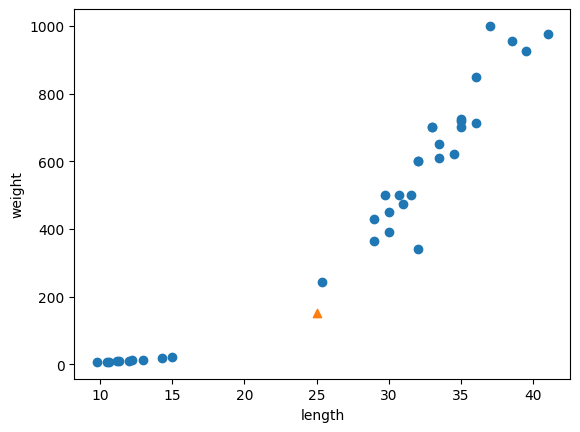

In [75]:
#그래프로 확인
import matplotlib.pyplot as plt
#훈련용 데이터셋(파란색)
plt.scatter(train_input[:,0], train_input[:,1])
#내가 확인해보고 싶은 데이터(주황색 세모)
#스캐터 마커 종류를 변경하고 싶다면? https://pyvisuall.tistory.com/39 참고
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###결론


---

└ x와 y축 비율이 다르기에 정확한 그래프로 판단 불가
<br/>
└ k-근접 이웃 알고리즘은 주변 5개를 비교하여 보기 때문에 조금 더 알아볼 필요가 있다.

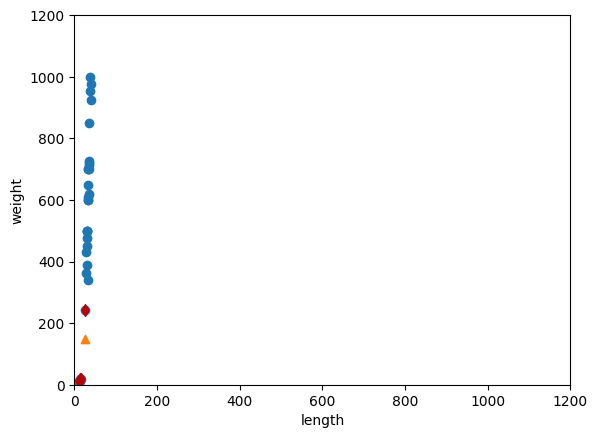

In [76]:
#내가 알고 싶은 값의 거리와 인덱스를 알아보기
distances, indexes = kn.kneighbors([[25,150]])

#입력 데이터 값
plt.scatter(train_input[:,0], train_input[:,1])
#알고 싶은 값
plt.scatter(25,150, marker='^')
#이웃의 값
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='d', color = '#bb0000')
#x좌표 비율 맞춰주는 코드
plt.ylim((0,1200))
plt.xlim((0,1200))
#비율 코드
#└ x좌표: xlim / y좌표: ylim
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#결론: 빨간색으로 25, 150에 대한 이웃이 누군지 파악됨

In [77]:
#k-최근접 알고리즘에 근접한 5개의 값
print(train_input[indexes])
#└ 빙어: 4 / 도미: 1

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [78]:
print(train_target[indexes])
#0(빙어): 4 / 1(도미): 1

[[1. 0. 0. 0. 0.]]


In [79]:
#거리 출력
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


###평균 구해보기

---

가장 널리 사용하는 전처리 방법: 표준점수(z점수) 구하기

└ 표준점수 : 각 특성값이 평균에서 표준편차의 몇 배 만큼 떨어져 있는지를 나타냄
<br/>
└ 분산     : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내서 구함
<br/>
└ 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
<br/>
└ 표준점수 : 각 데이터가 원점에서 몇 표준편차 만큼 떨어져 있는지 나타내는 값

In [81]:
#axis=0 -> 열 / axis=1 -> 행
#mean: 평균을 구함
#axis: 기준점(중심선)
mean = np.mean(train_input, axis=0)
#std : 표준편차를 구함
std = np.std(train_input, axis=0)
print(mean, std)

#train_input -> 36개의 요소와 2개의 특성을 가지고 있음
#(36,2) 크기의 배열
#mean, std: 행을 따라 각 열의 통계값을 계산함

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [86]:
#원본 데이터에서 평균을 빼고 표준편차로 나눠 표준점수를 변환
#표준점수 공식(암기해야함)
train_scaled = (train_input - mean) / std
#              (원본데이터  - 평균) / 표준편차
#scaled : 뼈대(트레이닝할 뼈대로 만들 변수)
#넘파이는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼줌
#std에 있는 두 표준편차를 다시 모든 행에 적용 -> 브로드캐스팅

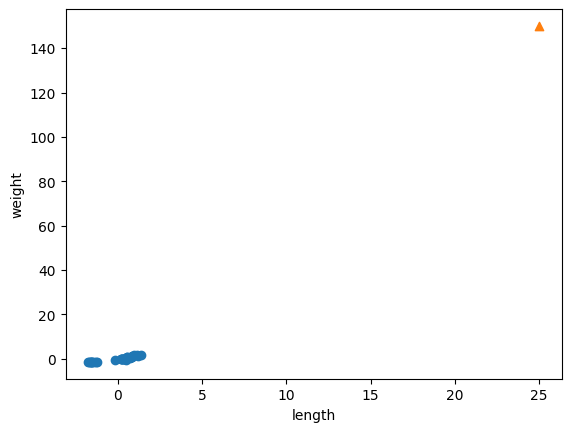

In [88]:
#전처리 데이터를 이용해서 모델 훈련 시키기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
#추가 데이터
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#오른쪽 맨 꼭대기에 수상한 샘플이 생김
#다른 값들은 표준점수를 위해 값이 축소 되었는데 25,150는 표준점수화가 안 됨
#훈련 세트를 평균으로 빼고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐

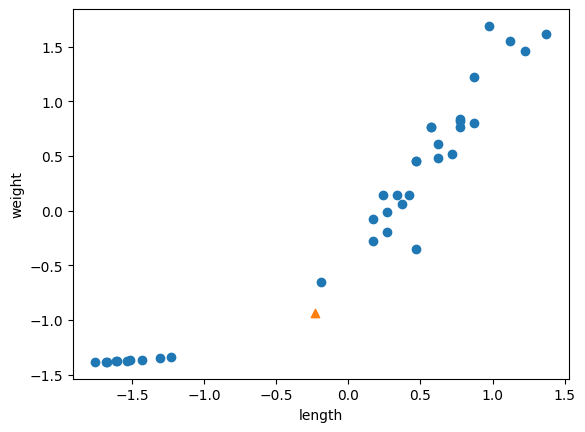

In [93]:
#알고자하는 값을 표준점수화 시키기
new = ([25,150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#결론
#x, y축의 범위가 비슷함(-1.5 ~ 1.5 사이값)

In [94]:
#훈련 시작
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [95]:
#test 입력값 역시 표준점수화
test_scaled = (test_input - mean) / std

In [98]:
#평가 진행
kn.score = (test_scaled, test_target)

#25, 150짜리의 결과 보기
result = kn.predict([new])
print(result)
#1로 도미 예측 성공

[1.]


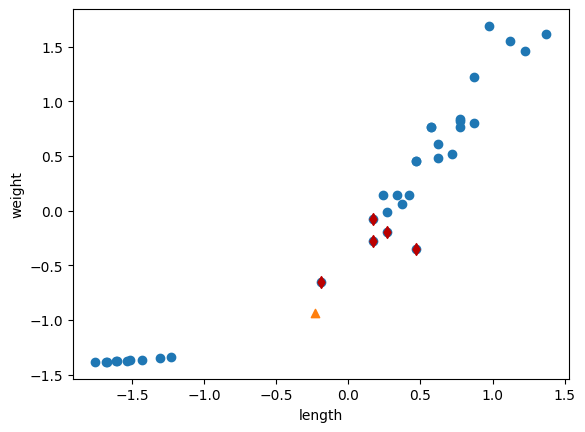

In [100]:
#kneibors()로 최근접 이웃을 구한 다음 산점도로 그려봄
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='d', color = '#bb0000')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###ㅇㅇ